In [ ]:
# 코렙에서 한글 깨짐

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')



# 시도별 전출입 인구수 - 수업 중

- 데이터파일 확인
  - 대구의 지역별 이동 인구수 분석
  - 불필요한 컬럼이나 행이 있는지 확인
  - 결측치 정도 확인

- 데이터 전처리
  - 파일 확인 후 체크한 사항 진행
  - 결측치 처리
  - 이상치 처리
  - 중복데이터 처리
  - 형변환 => 실제 데이터와 타입 일치

- 데이터 가공 : 분석하고자 하는 데이터 형태
  - 행인덱스 처리 : 멀티인덱스/컬럼 -> 행인덱스/행인덱스 초기화
  - 필요한 컬럼 & 행 추출
  - 추가적인 결측치/이상치/중복데이터 처리
  - 형변환 => 연속형 -> 범주형, 범주형 -> 연속형
    - 분석 목적에 대해 가공됨

- 데이터 분석
  - 탐색적 분석(EDA) : 주어진 데이터를 기반으로 의미를 찾아내는 것
  - 시각화 및 분석 결과 텍스트 요약 정리

[1] 준비과정 : 모듈, 데이터

In [ ]:
# [1-1] 모듈 로딩

import pandas as pd # 데이터 분석용 모듈
import matplotlib.pyplot as plt # 데이터 시각화용 모듈

In [ ]:
# [1-2] 데이터 준비

file_name=r'/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/시도별 전출입 인구수.xlsx'


In [ ]:
# [1-3] data -> DataFrame 형태 저장

data_df=pd.read_excel(file_name)

[2] 데이터 확인 : 행과 컬럼 수 , 실제 데이터와 컬럼 타입, 결측치 체크

In [ ]:
# [2-1] 기본 정보 확인 -> info(), describe()
#  - 행 수, 컬럼 수, 컬럼별 결측치 아닌 (non-null) 데이터 수 , 컬럼별 데이터 타입
#  - 메모리 사용량

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [ ]:
# [2-2] 기본 정보 확인 -> info(), describe()
#  - 수치 데이터 컬럼의 데이터 분포 확인  : 최대값, 최소값, 표준편차, 사분위수, 평균값
#  - 범주 데이터 컬럼의 데이터 분포 확인 : 고유값, 가장 많이 나온 값, 가장 많이 나온 값의 빈도 수

data_df.describe()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,18,324,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
unique,18,18,146,146,146,146,145,146,146,146,...,289,289,289,291,323,320,321,324,322,323
top,전국,전국,-,-,-,-,-,-,-,-,...,-,-,-,-,1489,1939,2026,1468,4303,947
freq,1,18,180,180,180,180,180,180,180,180,...,35,35,35,35,2,2,2,2,2,2


In [ ]:
data_df.describe(include='all') # 범주형 변수도 기초통계량 출력

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,18,324,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
unique,18,18,146,146,146,146,145,146,146,146,...,289,289,289,291,323,320,321,324,322,323
top,전국,전국,-,-,-,-,-,-,-,-,...,-,-,-,-,1489,1939,2026,1468,4303,947
freq,1,18,180,180,180,180,180,180,180,180,...,35,35,35,35,2,2,2,2,2,2


In [ ]:
# [2-3] 실제 데이터 info()에서 확인한 타입 비교 => head()/tail()

data_df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


기본 정보 확인 후 결과
- 불필요한 행/컬럼 : 0번 행 삭제
- 결측치 : '전출지별' 컬럼 -> 이전 행 값으로 채우기
- 이상치 : 행별로 '-' 값이 수치값과 섞여 있음 -> 처리 필요 -> 0으로 처리 필요  

[3] 데이터 전처리 : 기본확인 파악된 내용들 처리
  - 기본 확인 파악된 내용들 처리
  - 불필요 데이터 삭제 : 0번행 삭제
  - 결측치 데이터 처리 : '전출지별' 컬럼 처리
  - 이상치 데이터 처리 : '-' 에 대한 처리
  - 데이터 자료형 일치 : 형변환

In [ ]:
# [3-1] 불필요 데이터 처리
copy_df=data_df.drop(0)
copy_df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,NaN,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465


In [ ]:
# [3-2] 결측치 데이터 처리

copy_df.isna().sum()


전출지별    306
전입지별      0
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      3
1985      3
1986      3
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

In [ ]:
copy_df.columns

Index(['전출지별', '전입지별', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [ ]:
copy_df[['1984','1985','1986']]

,1984,1985,1986
1,9043238,8679097,8660428
2,3052558,2784387,2683013
3,872967,821207,831658
4,552902,539361,533854
5,425509,409361,382620
...,...,...,...
320,656,634,621
321,3068,2883,2151
322,719,616,725
323,2093,1585,1548


In [ ]:
copy_df[['1984','1985','1986']].isna()==True

,1984,1985,1986
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
320,False,False,False
321,False,False,False
322,False,False,False
323,False,False,False


In [ ]:
copy_df_na=copy_df[['1984','1985','1986']].isna()==True

In [ ]:
copy_df_na

,1984,1985,1986
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
320,False,False,False
321,False,False,False
322,False,False,False
323,False,False,False


In [ ]:
copy_df_na[copy_df_na.sum(axis=1)>=1] # 여러 열을 다 더하면 한 행이 되므로 axis=1 사용 , 결측치가 있으면 데이터 타입이 float

,1984,1985,1986
34,True,True,True
35,True,True,True
36,True,True,True


In [ ]:
copy_df_na[['1984','1985','1986']].fillna(0,inplace=True)

In [ ]:
# 위에서  SettingWithCopyWarning가 떠서 copy로 변경

copy_df_na[['1984','1985','1986']]=copy_df_na[['1984','1985','1986']].fillna(0).copy()

In [ ]:
copy_df_na.isna().sum()

1984    0
1985    0
1986    0
dtype: int64

In [ ]:
copy_df_na[copy_df_na.sum(axis=1)>=1]

,1984,1985,1986
34,True,True,True
35,True,True,True
36,True,True,True


### inplace?

In [ ]:
df2=pd.DataFrame([[1,1,pd.NA],[pd.NA,pd.NA,2],[pd.NA,3,3]])
df2

,0,1,2
0,1,1,<NA>
1,<NA>,<NA>,2
2,<NA>,3,3


In [ ]:
# 0번 컬럼을 이전 행 값으로 채우기

df2[0]

0       1
1    <NA>
2    <NA>
Name: 0, dtype: object

In [ ]:
df2[0].ffill() # vs 에서 FutureWarning 발생

0    1
1    1
2    1
Name: 0, dtype: int64

In [ ]:
a=df2[0].ffill()
a

0    1
1    1
2    1
Name: 0, dtype: int64

In [ ]:
b=df2[0].ffill(inplace=True)
b # b에는 값이 없음 - 원본을 바꿔서 NONE return

In [ ]:
df2

,0,1,2
0,1,1,<NA>
1,1,<NA>,2
2,1,3,3


In [ ]:
df2[[1,2]]

,1,2
0,1,<NA>
1,<NA>,2
2,3,3


In [ ]:
df2[[1,2]].ffill()

,1,2
0,1,<NA>
1,1,2
2,3,3


In [ ]:
df2[[1,2]].ffill(inplace=True) # df2가 바뀌지 않음 - 데이터프레임 뽑음

<ipython-input-30-8bd379369835>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[[1,2]].ffill(inplace=True) # df2가 바뀌지 않음 - 데이터프레임 뽑음


In [ ]:
df2 # - 행을 하나 뽑으면 적용 됨

,0,1,2
0,1,1,<NA>
1,1,<NA>,2
2,1,3,3


In [ ]:
c=df2[[1,2]].ffill() # 변수에 저장해서 하면 df2의 값이 바뀜
df2[[1,2]]=c
df2

,0,1,2
0,1,1,<NA>
1,1,1,2
2,1,3,3




---







In [ ]:
# 전출지별

copy_df['전출지별'].ffill(inplace=True)

## 전출지별 결측값을 모두 변경하고
## 이후 데이터의 결측치를 0으로 바꿔도 ㅇ

### pd.set_option('future.no_silent_downcasting',True) <- vs에서 FutureWarning 발생 시 해결
# copy_df.fillna(0,inplace=True)

In [ ]:
copy_df.fillna(0,inplace=True) # 또는 copy_df=copy_df.fill(0) 사용 - 권고

In [ ]:
copy_df['전출지별']

1           전국
2           전국
3           전국
4           전국
5           전국
        ...   
320    제주특별자치도
321    제주특별자치도
322    제주특별자치도
323    제주특별자치도
324    제주특별자치도
Name: 전출지별, Length: 324, dtype: object

In [ ]:
copy_df


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [ ]:
copy_df[copy_df['전출지별']=='대구광역시']

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
55,대구광역시,전국,-,-,-,-,-,-,-,-,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
56,대구광역시,서울특별시,-,-,-,-,-,-,-,-,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
57,대구광역시,부산광역시,-,-,-,-,-,-,-,-,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
58,대구광역시,대구광역시,-,-,-,-,-,-,-,-,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
59,대구광역시,인천광역시,-,-,-,-,-,-,-,-,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
60,대구광역시,광주광역시,-,-,-,-,-,-,-,-,...,563,624,527,577,711,622,902,629,547,515
61,대구광역시,대전광역시,-,-,-,-,-,-,-,-,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
62,대구광역시,울산광역시,-,-,-,-,-,-,-,-,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
63,대구광역시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,261,233,526,879,642,827
64,대구광역시,경기도,-,-,-,-,-,-,-,-,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354


In [ ]:
# [3-3] 이상치 데이터 처리

copy_df.replace('-',0,inplace=True)


=> 데이터 프레임 전체에서 inplace는 괜찮지만 일부 추출해서 inplace는 적용 안 될 수 있음

In [ ]:
copy_df.columns[2:].to_list()

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [ ]:
copy_df.shape

(324, 50)

In [ ]:
['int']*(copy_df.shape[1]-2)

['int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int']

In [ ]:
# [3-4] 자료형 변환

d_=dict(zip(copy_df.columns[2:].to_list(), ['int']*(copy_df.shape[1]-2)))

# dict 형태로 만들어서 '1970':'int' 형태로 만듦
copy_df=copy_df.astype(d_)

[4] 데이터 가공
  - 대구에서 전지역 전입 인구수 분석
  - 전출지별 - '대구광역시'
  - 전입지별 - '대구광역시','전국' 제외
  

In [ ]:
# - 대구 광역시 데이터만 추출

mask=(copy_df['전출지별']=="대구광역시")
city_df=copy_df[mask]
city_df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
55,대구광역시,전국,0,0,0,0,0,0,0,0,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
56,대구광역시,서울특별시,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
57,대구광역시,부산광역시,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
58,대구광역시,대구광역시,0,0,0,0,0,0,0,0,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
59,대구광역시,인천광역시,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
60,대구광역시,광주광역시,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
61,대구광역시,대전광역시,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
62,대구광역시,울산광역시,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
63,대구광역시,세종특별자치시,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
64,대구광역시,경기도,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354


In [ ]:
# - 전출지별 컬럼 삭제
city_df=city_df.drop('전출지별',axis=1)

# - 전입지별 컬럼 행 인덱스 설정
city_df.set_index('전입지별',inplace=True)

In [ ]:
# 대구 광역시, 전국 행 삭제
city_df.drop(['대구광역시','전국'], inplace=True)

In [ ]:
# 가공 데이터 확인

print(city_df.dtypes, city_df.columns, city_df.index, sep='\n\n')

1970    int64
1971    int64
1972    int64
1973    int64
1974    int64
1975    int64
1976    int64
1977    int64
1978    int64
1979    int64
1980    int64
1981    int64
1982    int64
1983    int64
1984    int64
1985    int64
1986    int64
1987    int64
1988    int64
1989    int64
1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
dtype: object

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005

[5] 분석 : 대구에서 전지역 전입 인구수 분석

In [ ]:
# - 그래프 2개 - 시 / 도 - 년도와 상관 없이
# 대구에서 타지역 가는거

In [ ]:
# [5-1] 대구에서 타지역 이동 인구수 총합

In [ ]:
city_df

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
서울특별시,0,0,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,0,0,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
인천광역시,0,0,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
광주광역시,0,0,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
대전광역시,0,0,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
울산광역시,0,0,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
경기도,0,0,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354
강원도,0,0,0,0,0,0,0,0,0,0,...,1996,1942,2039,1843,1807,1820,1884,1884,1748,1657


In [ ]:
city_df['총 이동 인구 수'] = city_df.sum(axis=1)
city_df

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,총 이동 인구 수
전입지별,,,,,,,,,,,,,,,,,,,,,
서울특별시,0,0,0,0,0,0,0,0,0,0,...,15469,13915,13310,13838,13673,13735,13038,12802,13011,638316
부산광역시,0,0,0,0,0,0,0,0,0,0,...,5207,5050,4906,5216,5543,6157,5182,4860,4840,258658
인천광역시,0,0,0,0,0,0,0,0,0,0,...,2003,1968,2000,1979,2202,2015,1987,1962,1930,77043
광주광역시,0,0,0,0,0,0,0,0,0,0,...,624,527,577,711,622,902,629,547,515,18531
대전광역시,0,0,0,0,0,0,0,0,0,0,...,2057,1956,2063,2144,2219,2254,2085,1949,1978,65964
울산광역시,0,0,0,0,0,0,0,0,0,0,...,3740,3551,3586,3844,3833,3835,3675,3266,2604,78498
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,261,233,526,879,642,827,3368
경기도,0,0,0,0,0,0,0,0,0,0,...,14534,14596,13320,13581,13659,12813,12322,11918,12354,418853
강원도,0,0,0,0,0,0,0,0,0,0,...,1942,2039,1843,1807,1820,1884,1884,1748,1657,80939


In [ ]:
city_df['총 이동 인구 수'].describe()

count    1.600000e+01
mean     2.800950e+05
std      5.320405e+05
min      3.368000e+03
25%      4.166925e+04
50%      7.777050e+04
75%      2.987068e+05
max      2.152105e+06
Name: 총 이동 인구 수, dtype: float64

In [ ]:
city_df.index

Index(['서울특별시', '부산광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도',
       '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'],
      dtype='object', name='전입지별')

In [ ]:
city_df.index[:7]

Index(['서울특별시', '부산광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시'], dtype='object', name='전입지별')

In [ ]:
city_df_c=city_df.index[:7]

In [ ]:
city_df['총 이동 인구 수'][:7]

전입지별
서울특별시      638316
부산광역시      258658
인천광역시       77043
광주광역시       18531
대전광역시       65964
울산광역시       78498
세종특별자치시      3368
Name: 총 이동 인구 수, dtype: int64

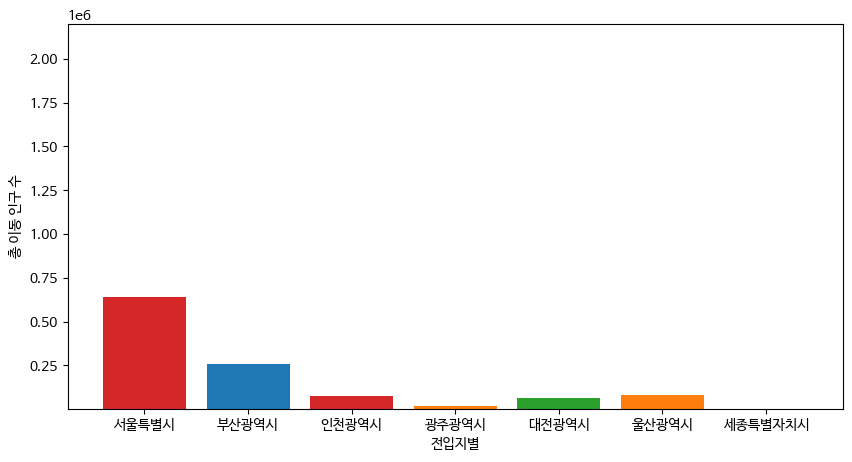

In [ ]:
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange','tab:green','tab:orange','tab:brown','tab:purple']

plt.figure(figsize=[10,5])

plt.bar(city_df.index[:7],city_df['총 이동 인구 수'][:7],color=bar_colors)
plt.ylim(bottom=3000,top=2200000)
plt.xlabel("전입지별")
plt.ylabel("총 이동 인구 수")
plt.show()

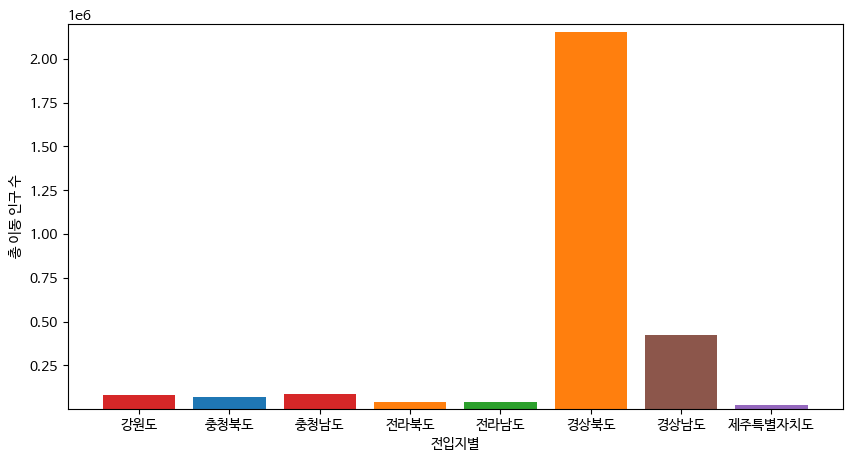

In [ ]:
plt.figure(figsize=[10,5])

plt.bar(city_df.index[8:],city_df['총 이동 인구 수'][8:],color=bar_colors)
plt.ylim(bottom=3000,top=2200000)
plt.xlabel("전입지별")
plt.ylabel("총 이동 인구 수")

plt.show()

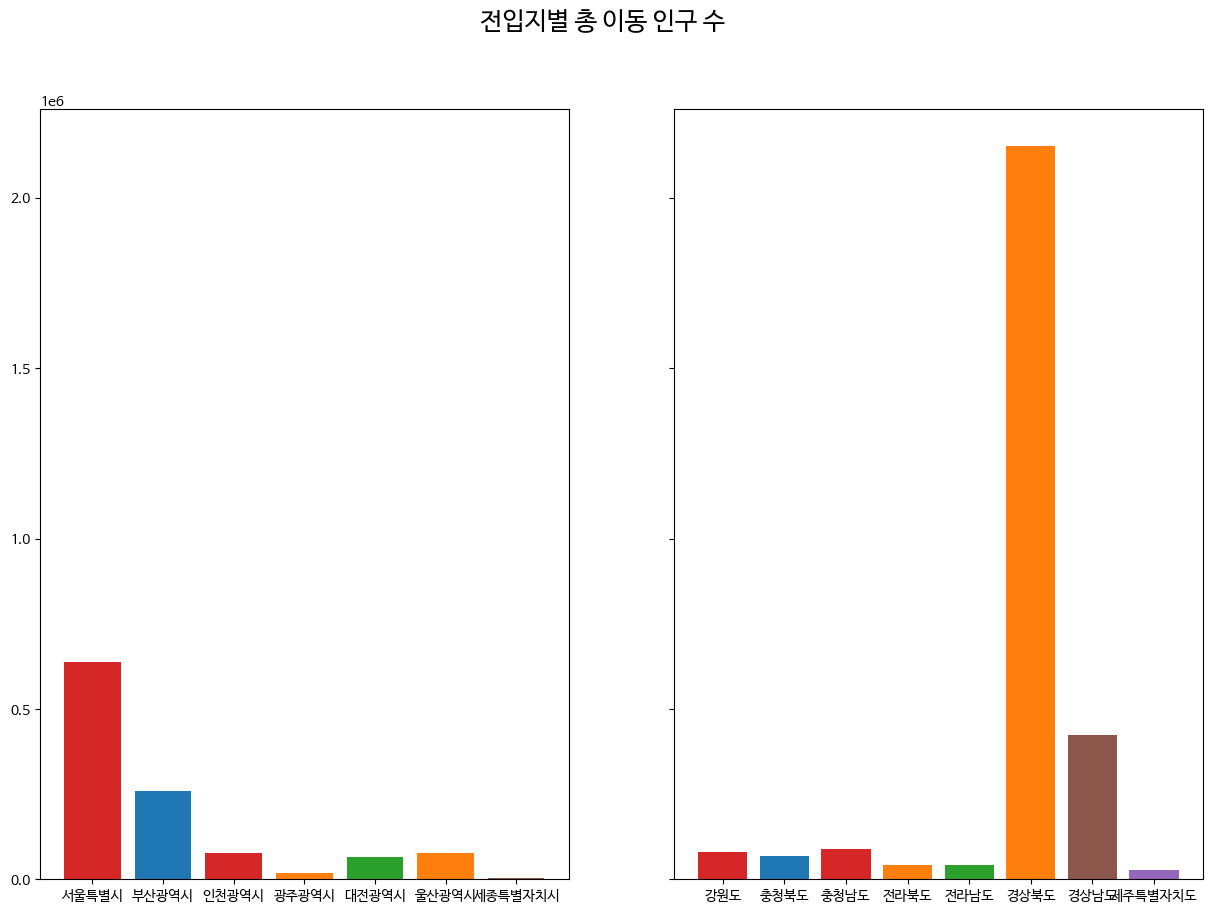

In [ ]:
fig=plt.figure(figsize=(15,10))
ax1,ax2=fig.subplots(1,2,sharey=True)

ax1.bar(city_df.index[:7],city_df['총 이동 인구 수'][:7],color=bar_colors)
ax2.bar(city_df.index[8:],city_df['총 이동 인구 수'][8:],color=bar_colors)


fig.suptitle("전입지별 총 이동 인구 수", fontsize=18)

plt.show()
